# Fraud Detection System - Complete Analysis

This notebook provides a comprehensive analysis of the fraud detection system.

In [19]:
# Import necessary libraries
import sys
import importlib
from pathlib import Path
src_path = str(Path().absolute().parent / 'src')
sys.path.insert(0, src_path)

# Import modules
import data_loader
from preprocessor import DataPreprocessor
from model_trainer import ModelTrainer
from model_evaluator import ModelEvaluator
from predictor import FraudPredictor

# Reload data_loader to pick up any changes
importlib.reload(data_loader)
from data_loader import DataLoader

## 1. Data Loading and Exploration


COMPREHENSIVE EXPLORATORY DATA ANALYSIS
[OK] Dataset loaded successfully!
  Shape: (284807, 31)

DATASET BASIC INFORMATION

Dataset Shape: (284807, 31)
Number of Features: 30
Number of Samples: 284,807

------------------------------------------------------------
Column Names:
------------------------------------------------------------
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

------------------------------------------------------------
Data Types:
------------------------------------------------------------
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17 

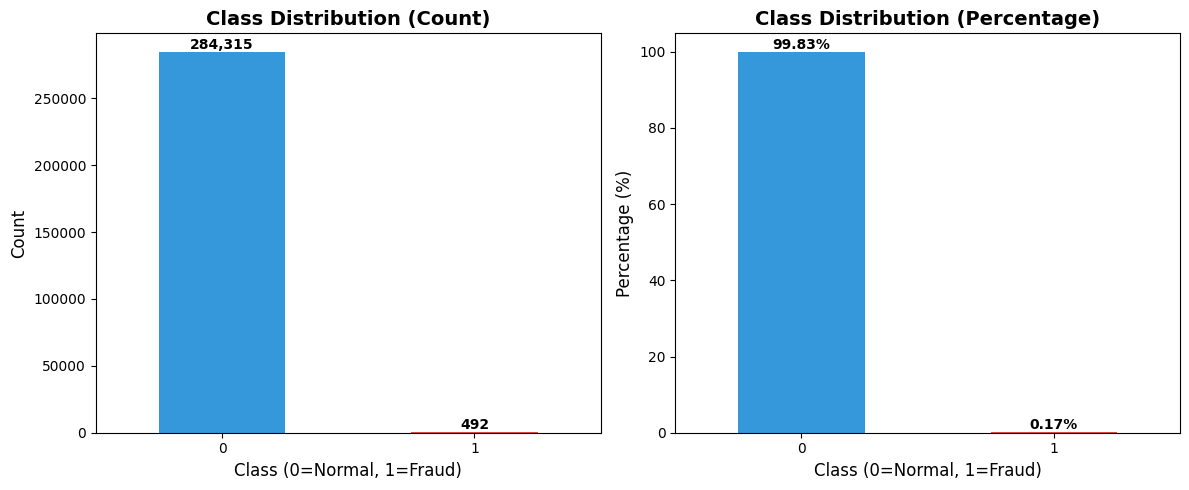


TRANSACTION AMOUNT ANALYSIS

Amount Statistics:
  Mean: $88.35
  Median: $22.00
  Std: $250.12
  Min: $0.00
  Max: $25691.16

Fraud Transactions:
  Mean: $122.21
  Median: $9.25
  Max: $2125.87

Normal Transactions:
  Mean: $88.29
  Median: $22.00
  Max: $25691.16

[OK] Visualization saved to d:\Projects\AI-Fraud-Detection-System\notebooks\amount_distribution.png


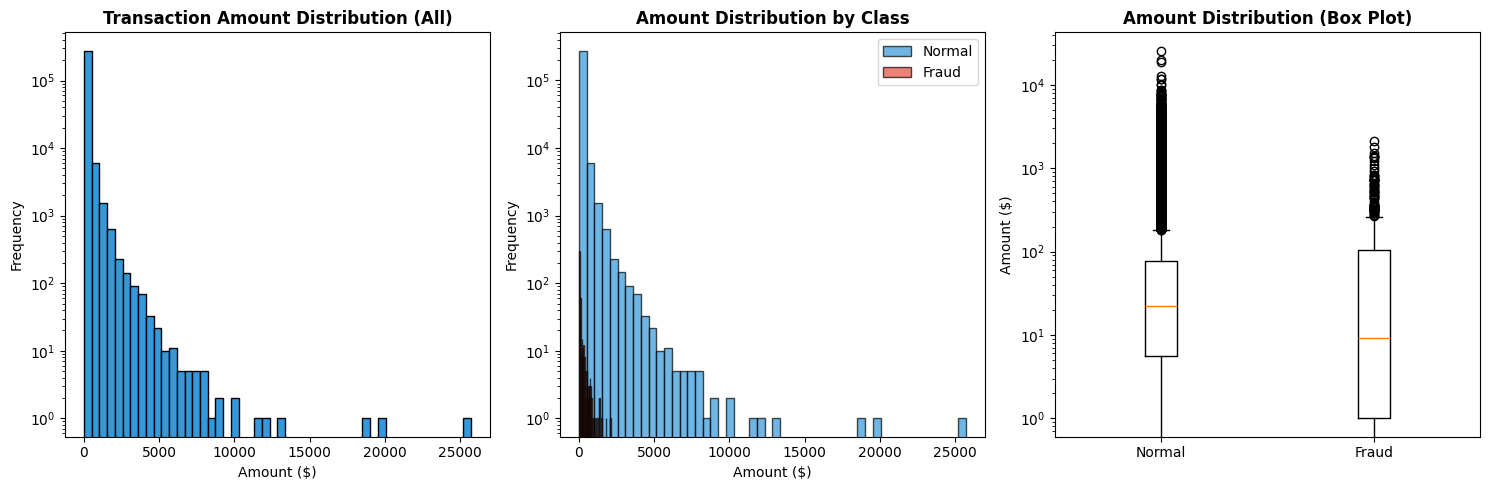


TIME-BASED ANALYSIS

[OK] Visualization saved to d:\Projects\AI-Fraud-Detection-System\notebooks\time_distribution.png


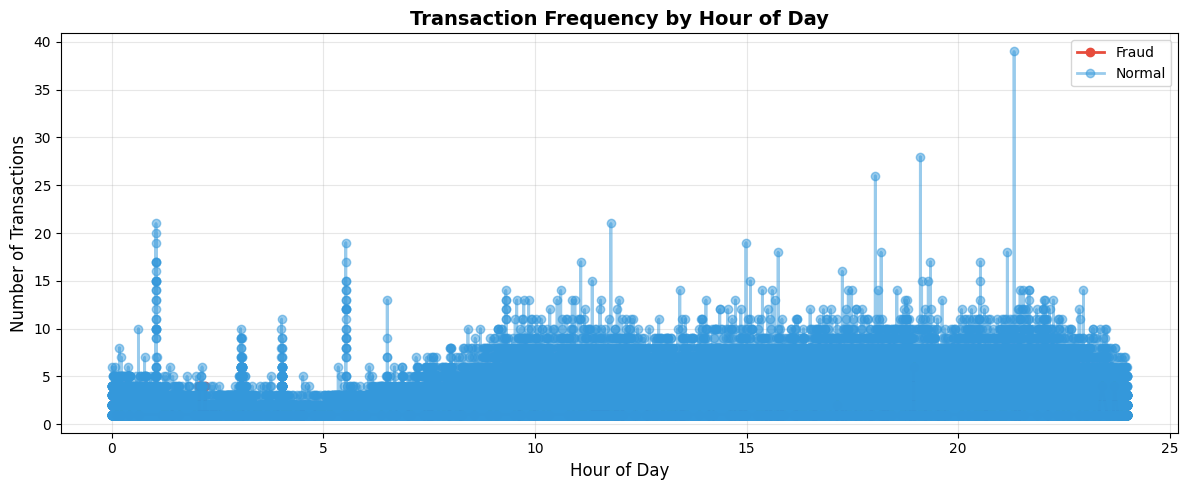


CORRELATION ANALYSIS

Top 10 Features Correlated with Fraud (Class):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

[OK] Visualization saved to d:\Projects\AI-Fraud-Detection-System\notebooks\correlation_heatmap.png


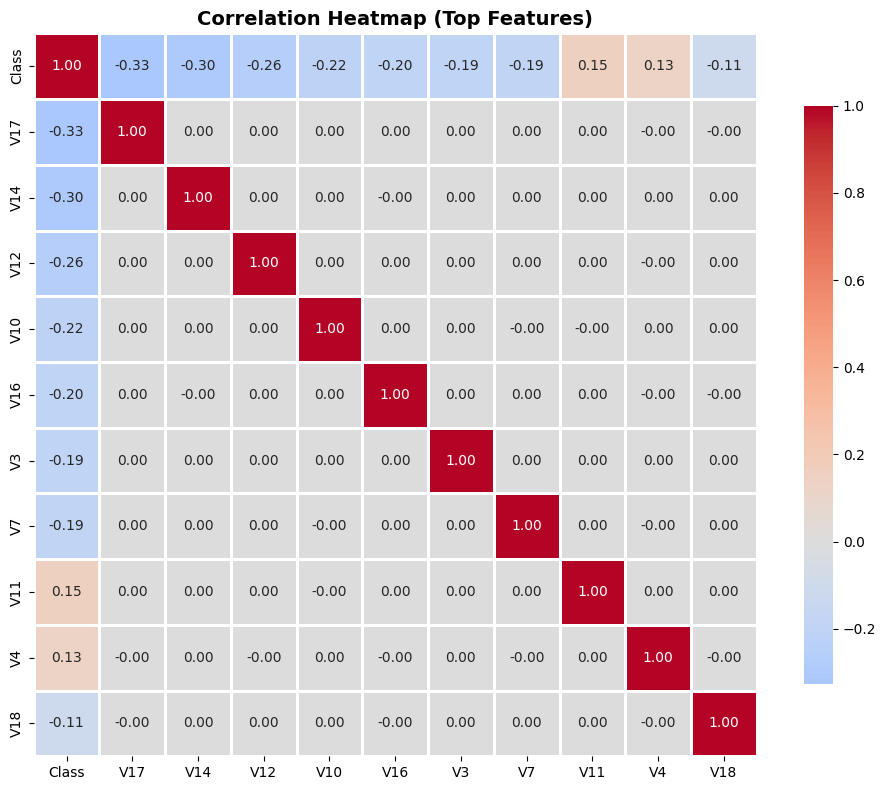


EDA COMPLETE!


In [20]:
# Load data
# Get the project root directory (parent of notebooks directory)
project_root = Path().absolute().parent
data_path = project_root / 'data' / 'creditcard.csv'
output_dir = project_root / 'notebooks'

# Reload data_loader module to pick up any changes
import importlib
import sys
if 'data_loader' in sys.modules:
    importlib.reload(sys.modules['data_loader'])
from data_loader import DataLoader

loader = DataLoader(data_path=str(data_path), output_dir=str(output_dir))
df = loader.full_exploration()

## 2. Data Preprocessing

In [21]:
# Preprocess data
import numpy as np

preprocessor = DataPreprocessor()
X_train, X_test, y_train, y_test = preprocessor.preprocess_pipeline(
    df, 
    use_smote=True, 
    smote_ratio=0.1
)

# Sample data for faster training (reduce to ~10% for speed)
print("\n" + "="*60)
print("SAMPLING DATA FOR FAST TRAINING")
print("="*60)
print(f"Original training size: {len(X_train):,} samples")

# Sample 10% of the data for fast training
np.random.seed(42)  # For reproducibility
sample_size = int(len(X_train) * 0.1)
sample_indices = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train = X_train.iloc[sample_indices].reset_index(drop=True)
y_train = y_train.iloc[sample_indices].reset_index(drop=True)

print(f"Sampled training size: {len(X_train):,} samples")
print(f"Fraud cases in sample: {y_train.sum():,}")
print("="*60)


DATA PREPROCESSING PIPELINE
[OK] Features prepared: 29 features, 284807 samples
  Feature columns: 29

[OK] Data split completed:
  Training set: 227,845 samples (80.0%)
  Test set: 56,962 samples (20.0%)
  Training fraud cases: 394 (0.17%)
  Test fraud cases: 98 (0.17%)
[OK] Scaler fitted on training data
[OK] Features scaled (mean~0, std~1)

Before SMOTE:
  Class 0 (Normal): 227,451
  Class 1 (Fraud): 394
  Ratio: 577.29:1

After SMOTE:
  Class 0 (Normal): 227,451
  Class 1 (Fraud): 22,745
  Ratio: 10.00:1
  Total samples: 250,196
[OK] Scaler saved to models/scaler.pkl

PREPROCESSING COMPLETE!

SAMPLING DATA FOR FAST TRAINING
Original training size: 250,196 samples
Sampled training size: 25,019 samples
Fraud cases in sample: 2,263


## 3. Model Training

In [22]:
# Train all models in FAST MODE (completes in < 1 minute)
import time
import importlib
import sys

# Reload model_trainer module to pick up any changes
if 'model_trainer' in sys.modules:
    importlib.reload(sys.modules['model_trainer'])
from model_trainer import ModelTrainer

start_time = time.time()

trainer = ModelTrainer(fast_mode=True)  # Enable fast mode
models = trainer.train_all_models(X_train, y_train, include_isolation=False)

# Save all trained models
project_root = Path().absolute().parent
models_dir = project_root / 'models'
models_dir.mkdir(exist_ok=True)
trainer.save_all_models(base_path=str(models_dir))

elapsed_time = time.time() - start_time
print(f"\n⏱️  Total training time: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")


TRAINING ALL MODELS (FAST MODE)

------------------------------------------------------------
Training Logistic Regression...
------------------------------------------------------------
  Using class weights: {np.int64(0): np.float64(0.5497231499384778), np.int64(1): np.float64(5.527839151568714)}
  Fast mode: Using default parameters (no grid search)
  Training completed

------------------------------------------------------------
Training Random Forest...
------------------------------------------------------------
  Using balanced class weights
  Fast mode: Using reduced parameters (no grid search)
  Training completed

ALL MODELS TRAINED SUCCESSFULLY!
[OK] Model saved to d:\Projects\AI-Fraud-Detection-System\models/logistic_regression.pkl
[OK] Model saved to d:\Projects\AI-Fraud-Detection-System\models/random_forest.pkl

⏱️  Total training time: 8.72 seconds (0.15 minutes)


## 4. Model Evaluation


COMPREHENSIVE MODEL EVALUATION

EVALUATION RESULTS: logistic_regression

Accuracy:  0.9744
Precision: 0.0584
Recall:    0.9184
F1-Score: 0.1099
ROC-AUC:   0.9664
Avg Precision: 0.7111

------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
                Predicted
              Normal  Fraud
Actual Normal   55414    1450
       Fraud        8      90

------------------------------------------------------------
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


WHY RECALL IS CRITICAL IN FRAUD DETECTION:

        Recall (True Positive Rate) measur

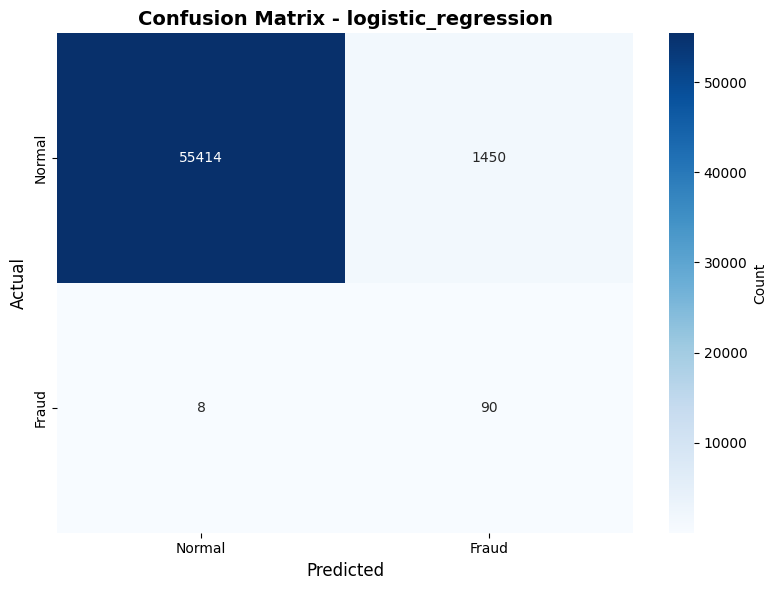


EVALUATION RESULTS: random_forest

Accuracy:  0.9988
Precision: 0.6056
Recall:    0.8776
F1-Score: 0.7167
ROC-AUC:   0.9654
Avg Precision: 0.8164

------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
                Predicted
              Normal  Fraud
Actual Normal   56808      56
       Fraud       12      86

------------------------------------------------------------
Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.61      0.88      0.72        98

    accuracy                           1.00     56962
   macro avg       0.80      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962


WHY RECALL IS CRITICAL IN FRAUD DETECTION:

        Recall (True Positive Rate) measures the proportion of actual fraud case

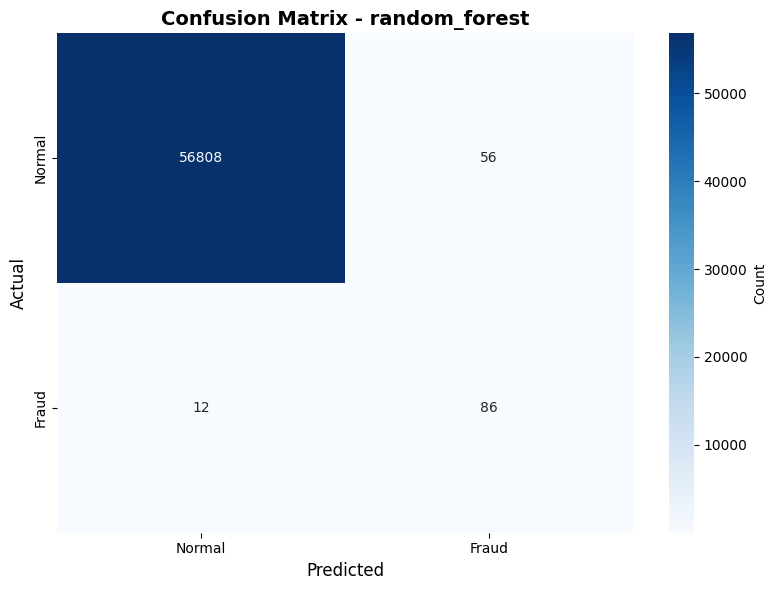


MODEL COMPARISON

              Model Accuracy Precision Recall F1-Score ROC-AUC Avg Precision
logistic_regression   0.9744    0.0584 0.9184   0.1099  0.9664        0.7111
      random_forest   0.9988    0.6056 0.8776   0.7167  0.9654        0.8164

[OK] Comparison chart saved to notebooks/model_comparison.png


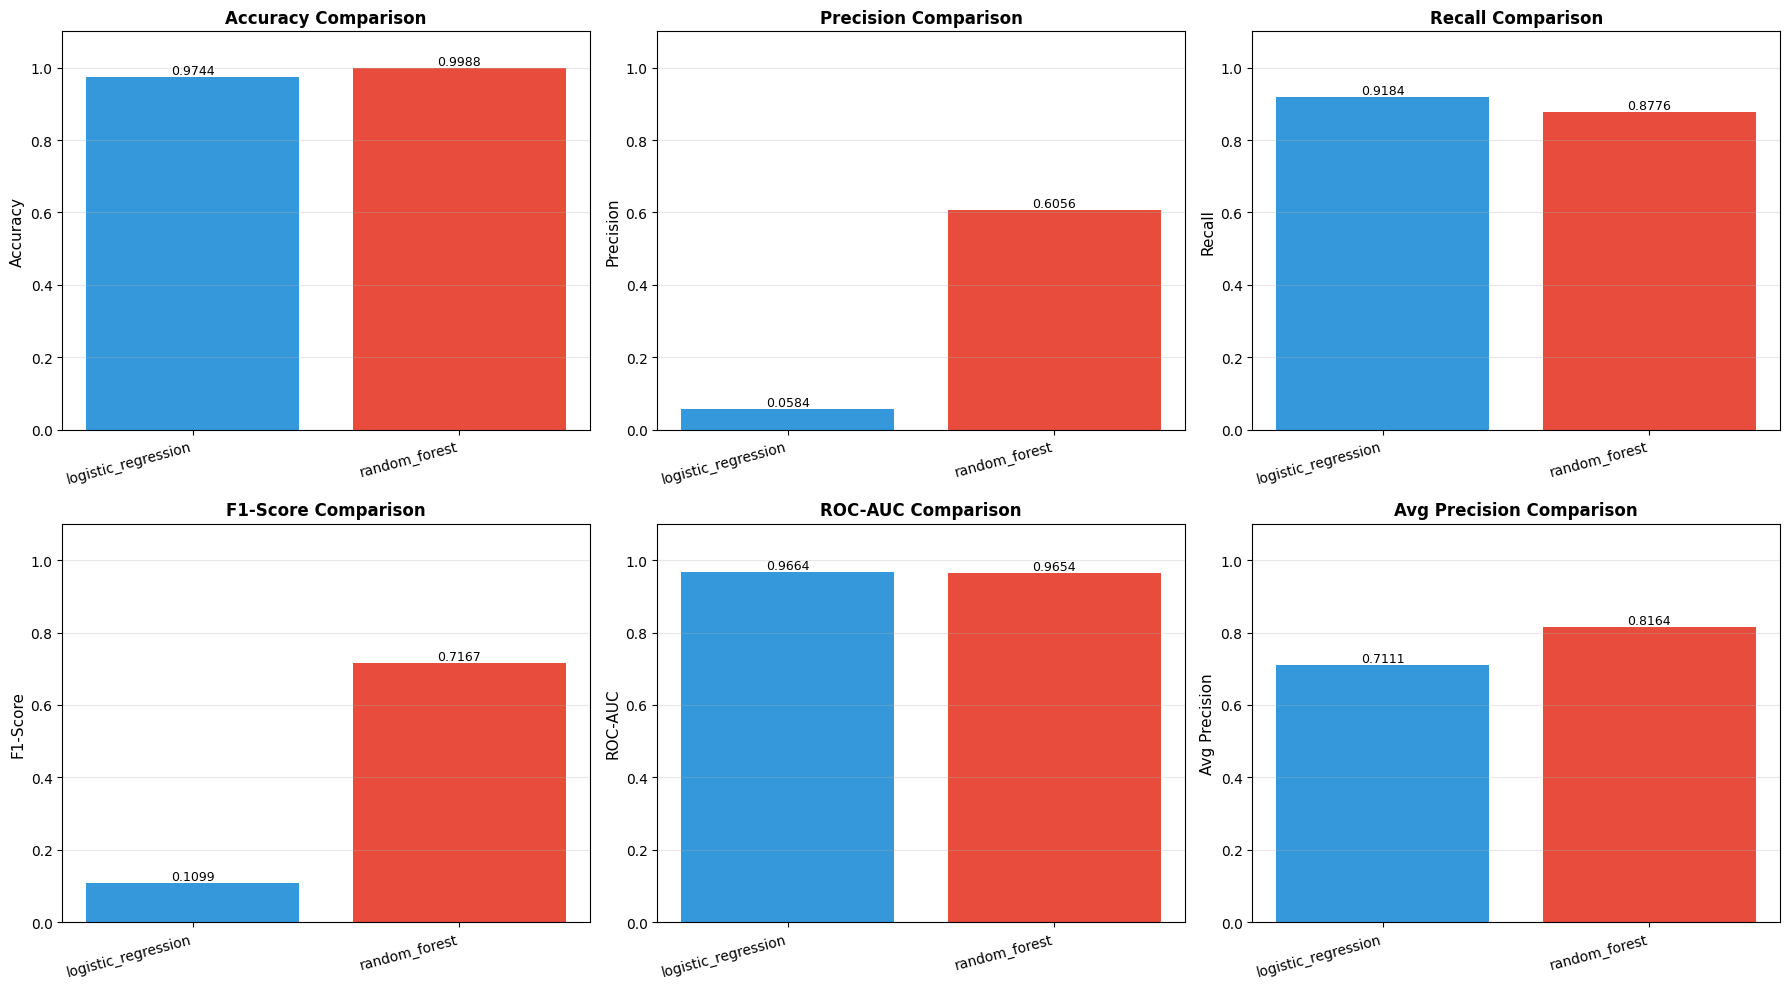

[OK] Comparison table saved to notebooks/model_comparison.csv
[OK] ROC curve saved to notebooks/roc_curves.png


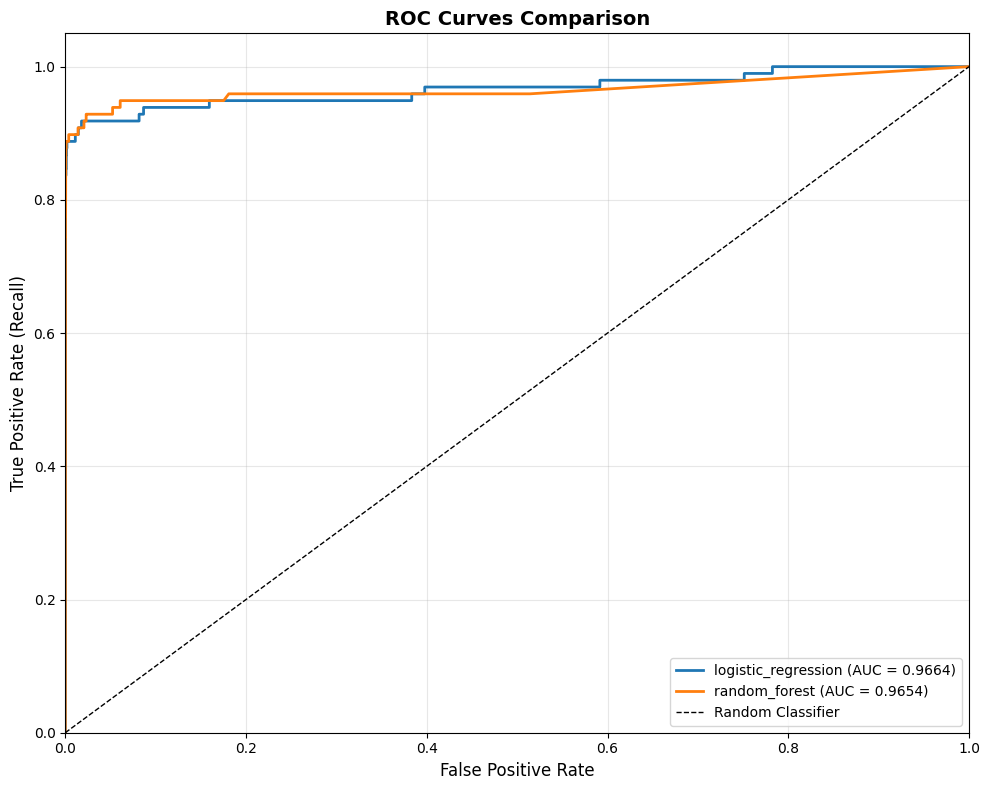

[OK] Precision-Recall curve saved to notebooks/pr_curves.png


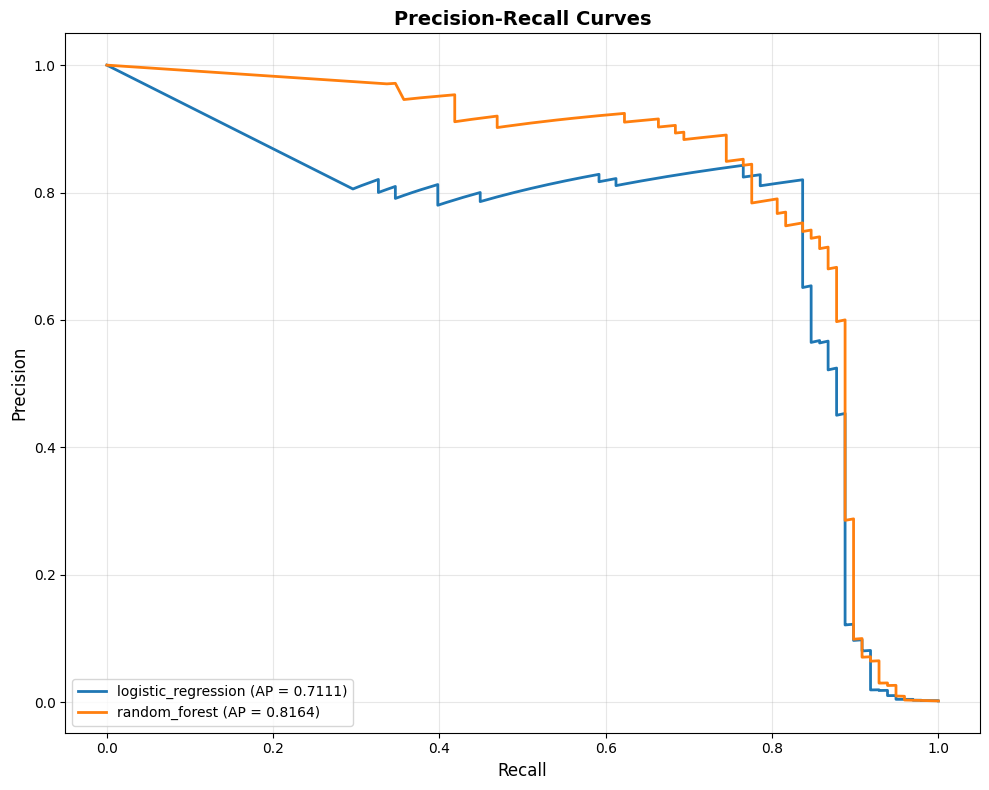

In [23]:
# Evaluate models
evaluator = ModelEvaluator()
results = evaluator.evaluate_all_models(models, X_test, y_test)

## 5. Real-time Prediction Example

In [24]:
# Make a prediction
# Get the project root directory (parent of notebooks directory)
project_root = Path().absolute().parent
model_path = project_root / 'models' / 'random_forest.pkl'
scaler_path = project_root / 'models' / 'scaler.pkl'

predictor = FraudPredictor()
predictor.load_model(str(model_path))
predictor.load_scaler(str(scaler_path))

# Sample transaction
sample = df.iloc[0].to_dict()
result = predictor.predict(sample)

print(f"Prediction: {result['prediction']}")
print(f"Fraud Probability: {result['fraud_probability']:.4f}")
print(f"Confidence: {result['confidence']:.4f}")

[OK] Model loaded from d:\Projects\AI-Fraud-Detection-System\models\random_forest.pkl
[OK] Scaler loaded from d:\Projects\AI-Fraud-Detection-System\models\scaler.pkl
Prediction: NORMAL
Fraud Probability: 0.0401
Confidence: 0.9599
